<a href="https://colab.research.google.com/github/IsaganiJulian/Marketing_Campaign_DTSC/blob/main/Digital_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Explore digital_marketing_campaign data set

### Data Cleaning

In [ ]:
digital_market = pd.read_csv('/content/digital_marketing_campaigns_smes(in).csv')
digital_market.head()

,campaign_id,company_size,industry,marketing_channel,ad_spend,duration,target_audience,region,device,operating_system,browser,engagement_metric,conversion_rate,success,budget_allocation,audience_reach,device_conversion_rate,os_conversion_rate,browser_conversion_rate
0,1,Nov-50,manufacturing,email,41484,71,18-34,Europe,tablet,Android,Safari,12547,0.141545,1,584.281690,12547.0000,0.7,0.8,0.7
1,2,100+,services,influencer,23155,13,55+,Africa,mobile,Android,Chrome,155190,0.498372,1,1781.153846,258650.0000,0.8,0.8,0.9
2,3,51-100,services,content marketing,25838,68,suburban,North America,tablet,iOS,Chrome,125296,0.213533,1,379.970588,139217.7778,0.7,0.9,0.9
3,4,Nov-50,technology,content marketing,28154,60,35-54,South America,mobile,Windows,Chrome,121101,0.297614,1,469.233333,151376.2500,0.8,0.7,0.9
4,5,10-Jan,manufacturing,search engine,49035,58,rural,Asia-Pacific,tablet,iOS,Firefox,482402,0.604580,1,845.431035,689145.7143,0.7,0.9,0.8


In [ ]:
digital_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   campaign_id              10000 non-null  int64  
 1   company_size             10000 non-null  object 
 2   industry                 10000 non-null  object 
 3   marketing_channel        10000 non-null  object 
 4   ad_spend                 10000 non-null  int64  
 5   duration                 10000 non-null  int64  
 6   target_audience          10000 non-null  object 
 7   region                   10000 non-null  object 
 8   device                   10000 non-null  object 
 9   operating_system         10000 non-null  object 
 10  browser                  10000 non-null  object 
 11  engagement_metric        10000 non-null  int64  
 12  conversion_rate          10000 non-null  float64
 13  success                  10000 non-null  int64  
 14  budget_allocation      

In [ ]:
digital_market.describe()

,campaign_id,ad_spend,duration,engagement_metric,conversion_rate,success,budget_allocation,audience_reach,device_conversion_rate,os_conversion_rate,browser_conversion_rate
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,27316.08920,47.659100,251164.666100,0.498985,0.896700,879.810058,305517.607129,0.800600,0.800300,0.801610
std,2886.89568,12942.21387,24.083469,143746.620147,0.291571,0.304366,935.853062,192156.315079,0.081611,0.081882,0.081652
min,1.00000,5001.00000,7.000000,103.000000,0.000101,0.000000,56.191011,170.000000,0.700000,0.700000,0.700000
25%,2500.75000,16222.25000,27.000000,127089.000000,0.242786,1.000000,333.169375,147909.642875,0.700000,0.700000,0.700000
50%,5000.50000,27178.50000,48.000000,251640.500000,0.501606,1.000000,570.422454,292265.916650,0.800000,0.800000,0.800000
75%,7500.25000,38412.25000,68.000000,374430.500000,0.755203,1.000000,1021.084059,438499.201400,0.900000,0.900000,0.900000
max,10000.00000,49997.00000,89.000000,499950.000000,0.999992,1.000000,6912.285714,832330.000000,0.900000,0.900000,0.900000


In [ ]:
digital_market.isnull().sum()

,0
campaign_id,0
company_size,0
industry,0
marketing_channel,0
ad_spend,0
duration,0
target_audience,0
region,0
device,0
operating_system,0


In [ ]:
digital_market.duplicated().sum()

0

In [ ]:
# Drop irrelevant columns
digital_market = digital_market.drop(columns=['company_size', 'device', 'device_conversion_rate', 'os_conversion_rate', 'browser_conversion_rate', 'operating_system', 'browser', 'region', 'campaign_id'])
digital_market.head()

,industry,marketing_channel,ad_spend,duration,target_audience,engagement_metric,conversion_rate,success,budget_allocation,audience_reach
0,manufacturing,email,41484,71,18-34,12547,0.141545,1,584.281690,12547.0000
1,services,influencer,23155,13,55+,155190,0.498372,1,1781.153846,258650.0000
2,services,content marketing,25838,68,suburban,125296,0.213533,1,379.970588,139217.7778
3,technology,content marketing,28154,60,35-54,121101,0.297614,1,469.233333,151376.2500
4,manufacturing,search engine,49035,58,rural,482402,0.604580,1,845.431035,689145.7143


### EDA

In [ ]:
digital_market['success'].value_counts()

,count
success,
1,8967
0,1033


In [ ]:
digital_market['marketing_channel'].value_counts()

,count
marketing_channel,
content marketing,2140
search engine,1997
influencer,1967
social media,1953
email,1943


In [ ]:
digital_market['industry'].value_counts()

,count
industry,
finance,2572
services,1948
manufacturing,1512
e-commerce,1476
retail,1009
technology,983
healthcare,500


In [ ]:
digital_market['target_audience'].value_counts()

,count
target_audience,
rural,1699
18-34,1678
suburban,1668
55+,1664
urban,1654
35-54,1637


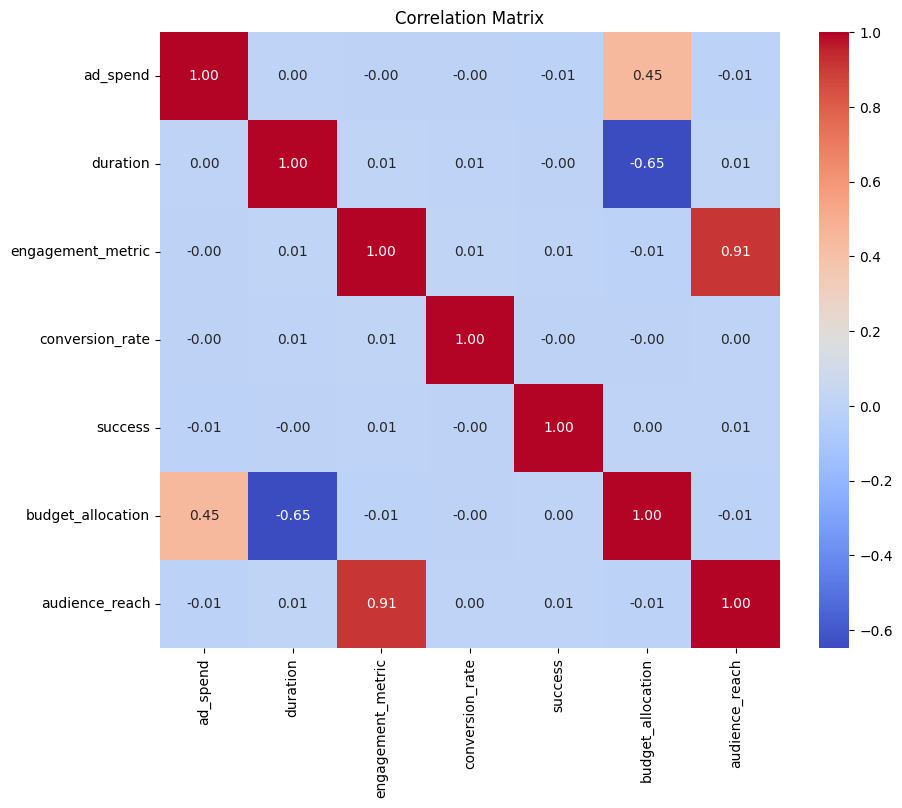

,ad_spend,duration,engagement_metric,conversion_rate,success,budget_allocation,audience_reach
ad_spend,1.000000,0.002876,-0.002086,-0.001549,-0.006496,0.445032,-0.005779
duration,0.002876,1.000000,0.008793,0.005731,-0.004354,-0.648502,0.013459
engagement_metric,-0.002086,0.008793,1.000000,0.008940,0.005567,-0.008267,0.911241
conversion_rate,-0.001549,0.005731,0.008940,1.000000,-0.003640,-0.000071,0.004626
success,-0.006496,-0.004354,0.005567,-0.003640,1.000000,0.003113,0.006387
budget_allocation,0.445032,-0.648502,-0.008267,-0.000071,0.003113,1.000000,-0.010566
audience_reach,-0.005779,0.013459,0.911241,0.004626,0.006387,-0.010566,1.000000


In [ ]:
# Correlation Matrix
def correlation_matrix(df):
  """

  Generates a dislay of a correlation matrix heatmap for numeric columns in a DataFrame.

  Args:
  df (pandas.DataFrame): The input DataFrame containing numeric columns.

  """
  # Select only numerical columns for correlation matrix
  numerical_df= digital_market.select_dtypes(include=[np.number])

  # Calculate the correlation matrix
  corr_matrix = numerical_df.corr()
  plt.figure(figsize=(10, 8))
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
  plt.title("Correlation Matrix")
  plt.show()

  return corr_matrix

correlation_matrix(digital_market)

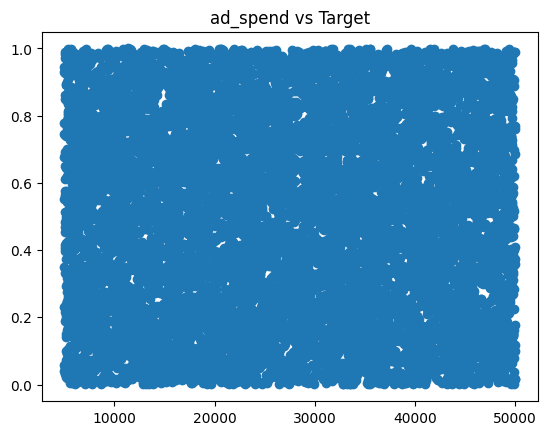

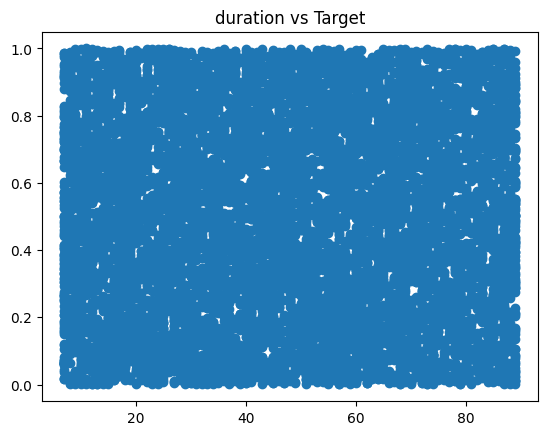

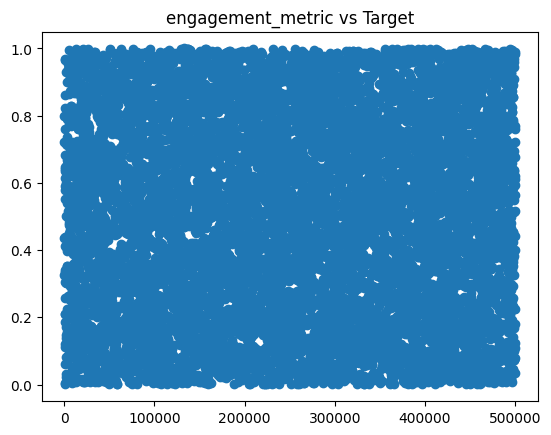

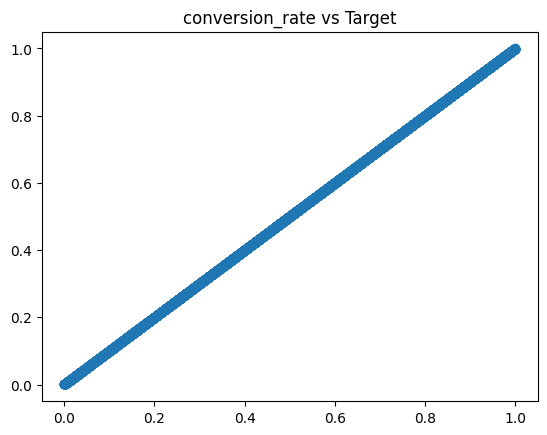

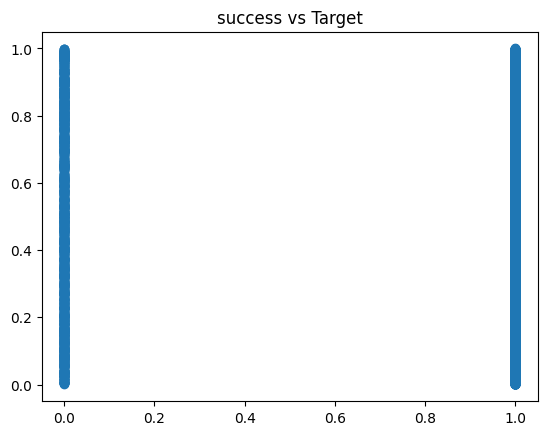

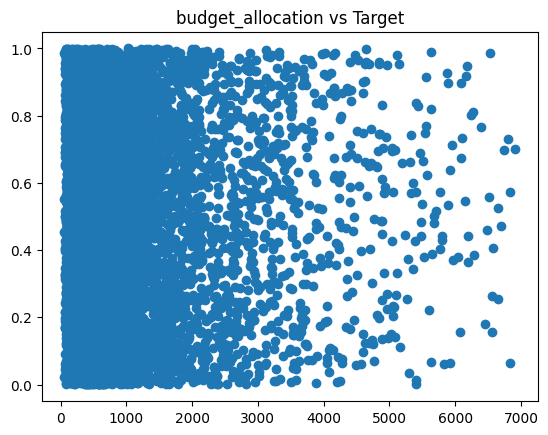

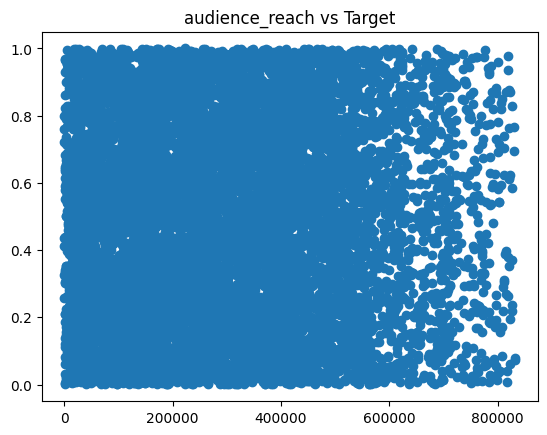

In [ ]:
numeric_features = ['ad_spend', 'duration', 'engagement_metric', 'conversion_rate',
                      'success', 'budget_allocation', 'audience_reach']
for col in numeric_features:
    plt.scatter(digital_market[col], digital_market['conversion_rate'])
    plt.title(f'{col} vs Target')
    plt.show()

### Feature Engineering

In [ ]:
digital_market.head()

,industry,marketing_channel,ad_spend,duration,target_audience,engagement_metric,conversion_rate,success,budget_allocation,audience_reach
0,manufacturing,email,41484,71,18-34,12547,0.141545,1,584.281690,12547.0000
1,services,influencer,23155,13,55+,155190,0.498372,1,1781.153846,258650.0000
2,services,content marketing,25838,68,suburban,125296,0.213533,1,379.970588,139217.7778
3,technology,content marketing,28154,60,35-54,121101,0.297614,1,469.233333,151376.2500
4,manufacturing,search engine,49035,58,rural,482402,0.604580,1,845.431035,689145.7143


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd

def create_interaction_features(digital_market):
    """
    Creates interaction features for the digital_market df

    Args:
        digital_market: The input DataFrame containing the digital marketing data

    Returns:
        digital_market: The updated DataFrame with interaction features
    """

    # 1. One-Hot Encoding:
    categorical_features = ['industry', 'marketing_channel', 'target_audience']
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_data = encoder.fit_transform(digital_market[categorical_features])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features), index=digital_market.index)
    digital_market = pd.concat([digital_market, encoded_df], axis=1)
    digital_market = digital_market.drop(columns=categorical_features)

    # 2. Interaction Feature Creation:
    # --- Interactions with Engagement Metrics ---
    digital_market['ad_spend_duration'] = digital_market['ad_spend'] * digital_market['duration']
    digital_market['ad_spend_engagement'] = digital_market['ad_spend'] * digital_market['engagement_metric']

    # --- Interactions with Conversion Metrics ---
    digital_market['conversion_rate_audience_urban'] = digital_market['conversion_rate'] * digital_market['target_audience_urban']

    # Interactions with categorical features
    digital_market['industry_e-commerce_channel_social_media'] = digital_market['industry_e-commerce'] * digital_market['marketing_channel_social media']
    digital_market['audience_18-34_channel_influencer'] = digital_market['target_audience_18-34'] * digital_market['marketing_channel_influencer']

    # Interactions with numerical and categorical features
    digital_market['ad_spend_industry_finance'] = digital_market['ad_spend'] * digital_market['industry_finance']
    digital_market['duration_audience_suburban'] = digital_market['duration'] * digital_market['target_audience_suburban']

    # Interactions based on domain knowledge
    digital_market['budget_allocation_audience_reach'] = digital_market['budget_allocation'] * digital_market['audience_reach']
    digital_market['conversion_rate_engagement_metric'] = digital_market['conversion_rate'] * digital_market['engagement_metric']

    # --- Interactions with Engagement Metrics ---
    digital_market['clicks_audience_18-34'] = digital_market['engagement_metric'] * digital_market['target_audience_18-34']
    digital_market['engagement_channel_social_media'] = digital_market['engagement_metric'] * digital_market['marketing_channel_social media']
    digital_market['engagement_duration'] = digital_market['engagement_metric'] / digital_market['duration']

    # --- Interactions with Conversion Metrics ---
    digital_market['conversion_audience_35-54'] = digital_market['conversion_rate'] * digital_market['target_audience_35-54']
    digital_market['conversion_channel_search_engine'] = digital_market['conversion_rate'] * digital_market['marketing_channel_search engine']
    digital_market['conversion_ad_spend'] = digital_market['conversion_rate'] * digital_market['ad_spend']

    # --- Interactions with Budget Allocation ---
    digital_market['budget_industry_healthcare'] = digital_market['budget_allocation'] * digital_market['industry_healthcare']
    digital_market['budget_audience_55+'] = digital_market['budget_allocation'] * digital_market['target_audience_55+']
    digital_market['budget_channel_email'] = digital_market['budget_allocation'] * digital_market['marketing_channel_email']

    # 3. Feature Scaling:
    numerical_features = digital_market.select_dtypes(include=['float64', 'int64']).columns
    scaler = StandardScaler()
    digital_market[numerical_features] = scaler.fit_transform(digital_market[numerical_features])

    return digital_market

In [ ]:
digital_market_with_interactions = create_interaction_features(digital_market)
digital_market_with_interactions.head()

,ad_spend,duration,engagement_metric,conversion_rate,success,budget_allocation,audience_reach,industry_e-commerce,industry_finance,industry_healthcare,...,conversion_rate_engagement_metric,clicks_audience_18-34,engagement_channel_social_media,engagement_duration,conversion_audience_35-54,conversion_channel_search_engine,conversion_ad_spend,budget_industry_healthcare,budget_audience_55+,budget_channel_email
0,1.094760,0.969215,-1.660071,-1.225970,0.339412,-0.315801,-1.524724,-0.416123,-0.588436,-0.229416,...,-1.116309,-0.267767,-0.417764,-0.859285,-0.374965,-0.415787,-0.706022,-0.15524,-0.287823,0.799414
1,-0.321529,-1.439196,-0.667699,-0.002102,0.339412,0.963173,-0.243916,-0.416123,-0.588436,-0.229416,...,-0.435617,-0.380557,-0.417764,0.422420,-0.374965,-0.415787,-0.189848,-0.15524,3.210184,-0.322448
2,-0.114213,0.844642,-0.875672,-0.979060,0.339412,-0.534127,-0.865484,-0.416123,-0.588436,-0.229416,...,-0.891302,-0.380557,-0.417764,-0.677740,-0.374965,-0.415787,-0.738313,-0.15524,-0.287823,-0.322448
3,0.064746,0.512448,-0.904857,-0.690675,0.339412,-0.438741,-0.802207,-0.416123,-0.588436,-0.229416,...,-0.807651,-0.380557,-0.417764,-0.658585,0.974568,-0.415787,-0.477697,-0.15524,-0.287823,-0.322448
4,1.678229,0.429399,1.608726,0.362176,0.339412,-0.036737,1.996538,-0.416123,-0.588436,-0.229416,...,1.494840,-0.380557,-0.417764,0.027869,-0.374965,2.137468,1.459023,-0.15524,-0.287823,-0.322448


In [ ]:
digital_market_with_interactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 43 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ad_spend                                  10000 non-null  float64
 1   duration                                  10000 non-null  float64
 2   engagement_metric                         10000 non-null  float64
 3   conversion_rate                           10000 non-null  float64
 4   success                                   10000 non-null  float64
 5   budget_allocation                         10000 non-null  float64
 6   audience_reach                            10000 non-null  float64
 7   industry_e-commerce                       10000 non-null  float64
 8   industry_finance                          10000 non-null  float64
 9   industry_healthcare                       10000 non-null  float64
 10  industry_manufacturing             

### Model Training
Split data:
- 60% for training (X_train, y_train)
- 20% for validation (X_val, y_val)
- 20% for testing (X_test, y_test)

In [ ]:
X = digital_market_with_interactions.drop('conversion_rate', axis=1)
y = digital_market_with_interactions['conversion_rate']

In [ ]:
from sklearn.model_selection import train_test_split

# First split: separate out the test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: separate train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

y_pred = baseline_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Baseline Model - MSE: {mse}, R2: {r2}")

Baseline Model - MSE: 0.11007938218073332, R2: 0.8892401806159396


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_val)
mse_rf = mean_squared_error(y_val, y_pred_rf)
r2_rf = r2_score(y_val, y_pred_rf)

print(f"Random Forest Model - MSE: {mse_rf}, R2: {r2_rf}")

Random Forest Model - MSE: 0.001243845027096273, R2: 0.9987484663538831


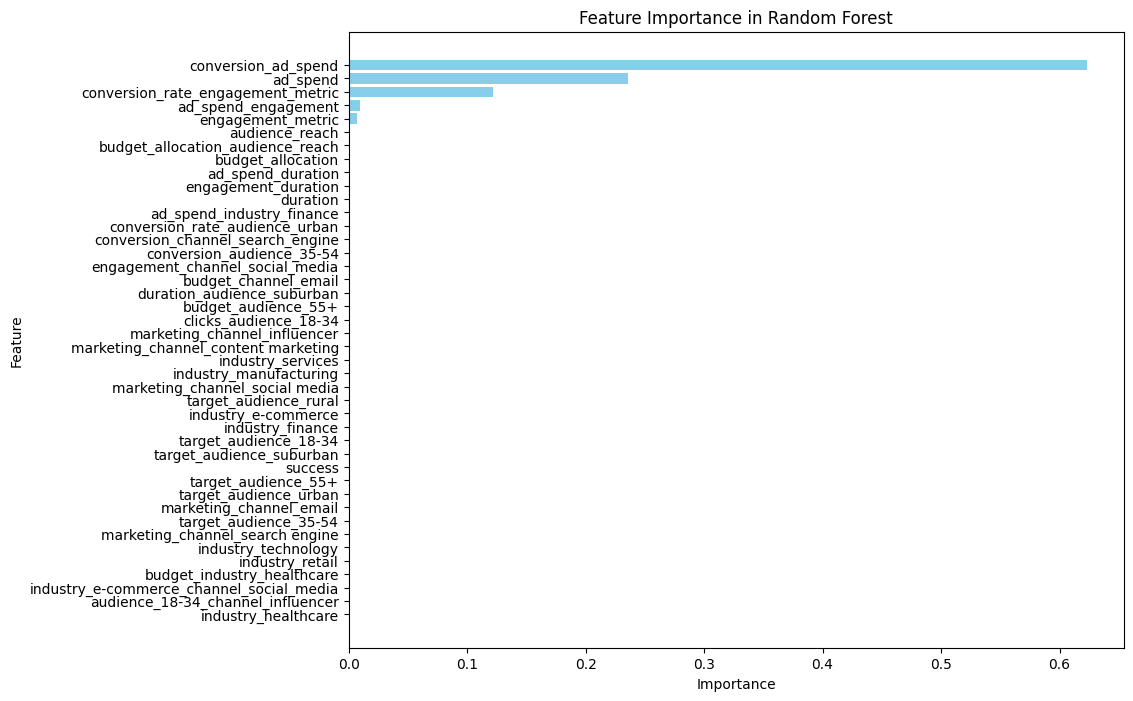

In [ ]:
# Get feature importances
importances = best_rf_model.feature_importances_
indices = range(len(importances))

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort features by importance
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # To display the most important features at the top
plt.show()

 96%|=================== | 1929/2000 [00:13<00:00]       

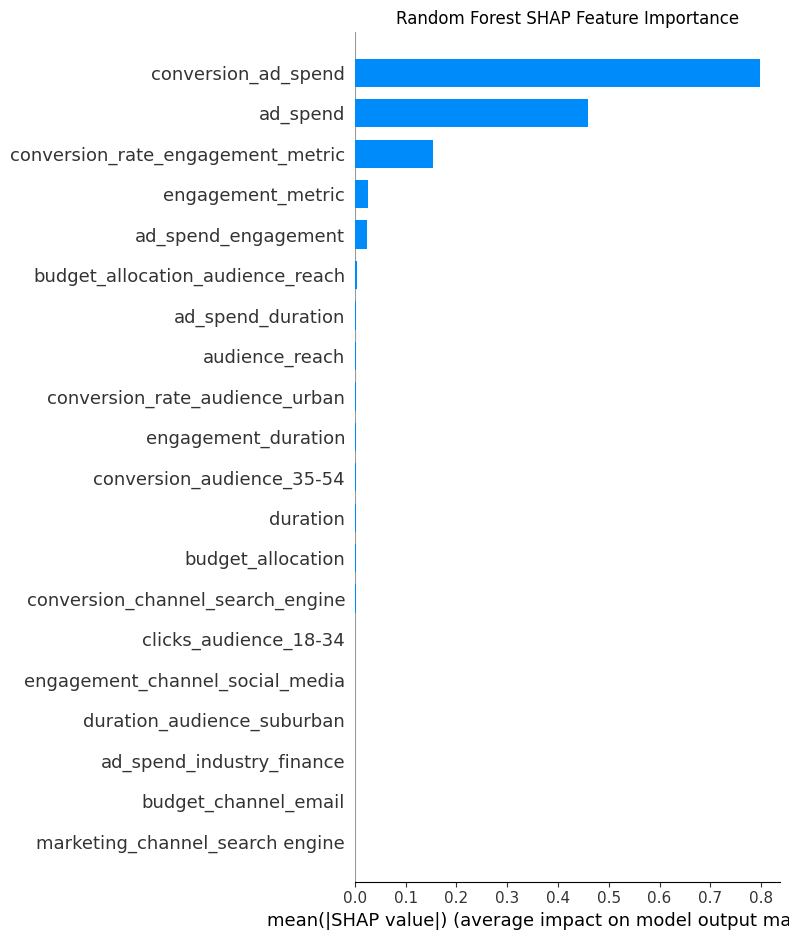

In [ ]:
# Create a SHAP explainer and compute SHAP values
import shap
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("Random Forest SHAP Feature Importance")
plt.tight_layout()
plt.show()

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, y_test, enable_categorical=True)

# Define parameters
params = {
    "objective": "reg:squarederror",  # for regression, use "binary:logistic" for binary classification
    "tree_method": "hist"  # use "gpu_hist" if you have GPU support
}

# Train the model
num_boost_round = 100
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=num_boost_round
)

# Make predictions
preds = model.predict(dtest)

# Evaluate the model (for regression)
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, preds, squared=False)
r2 = r2_score(y_test, preds)
print(f"RMSE: {rmse:.3f}")
print(f"R2: {r2:.3f}")

RMSE: 0.051
R2: 0.997


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


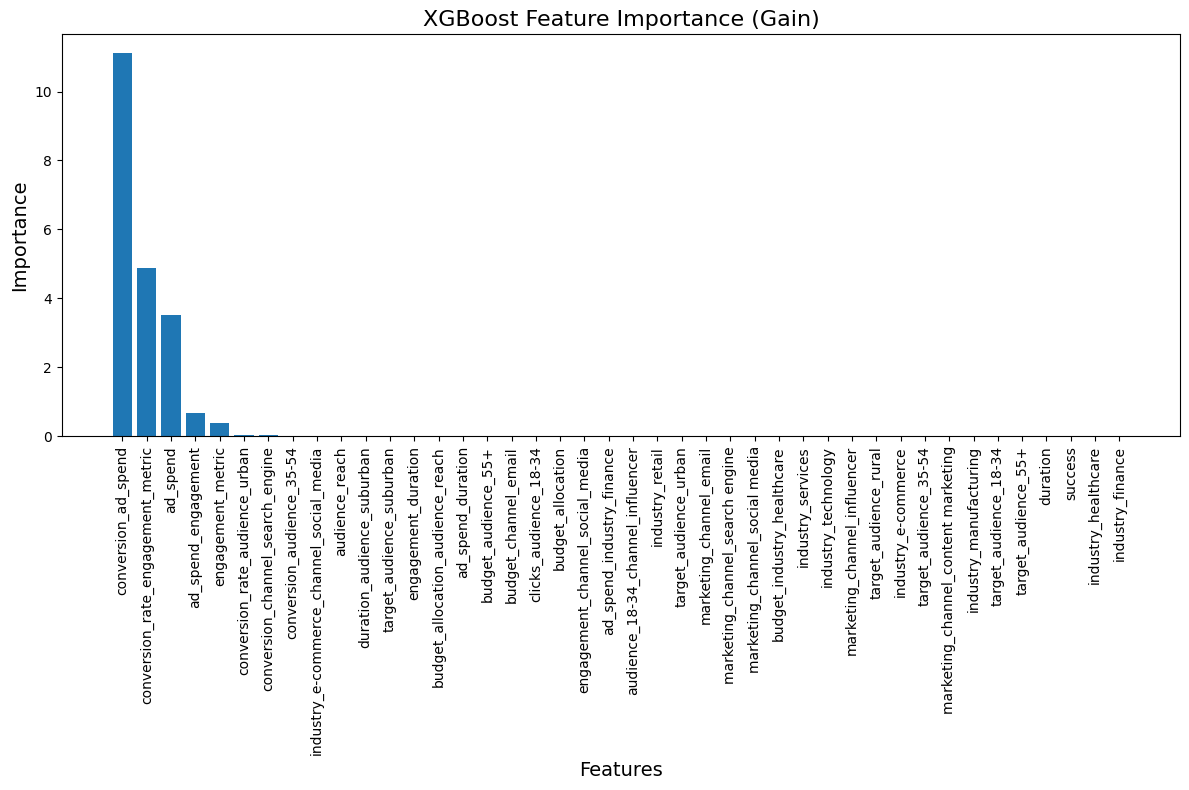

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances
importances = model.get_score(importance_type='gain')
feature_importance_df = pd.DataFrame({'Feature': list(importances.keys()), 'Importance': list(importances.values())})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('XGBoost Feature Importance (Gain)', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

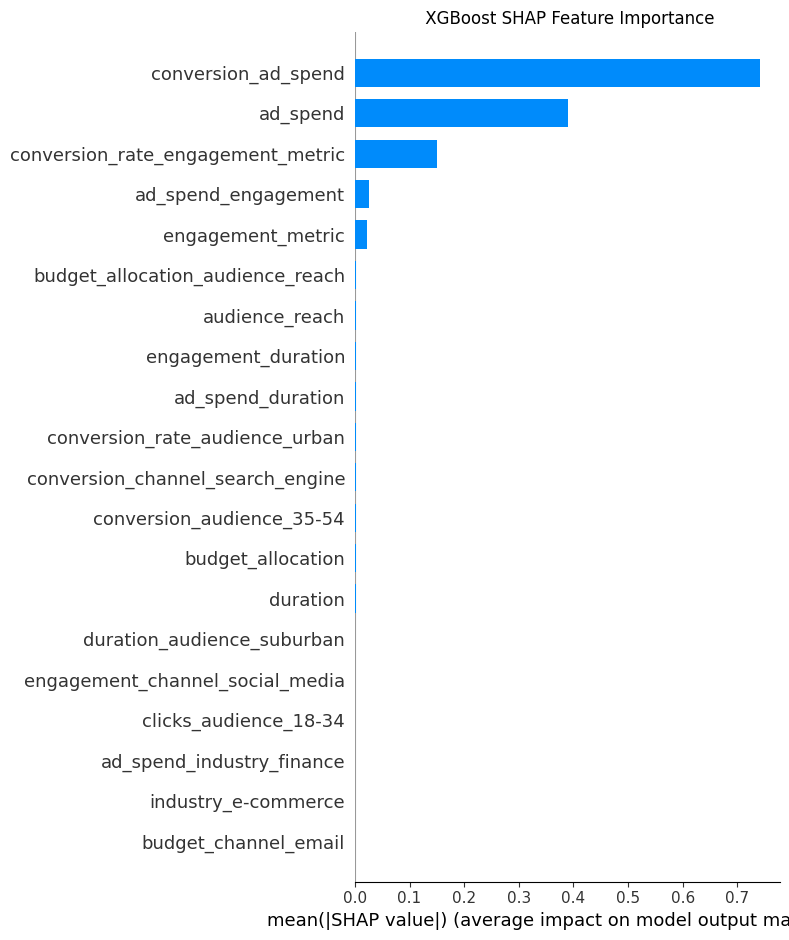

In [ ]:
# Compute SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title(' XGBoost SHAP Feature Importance')
plt.tight_layout()
plt.show()
